In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('zomato/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Checking the number of rows and columns and list all column names
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns.tolist())

Shape of dataset: (51717, 17)

Columns in dataset:
 ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


In [5]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
# Basic stats for numerical data
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [13]:
#Convert the cost column to numbers by first removing commas


import numpy as np

def convert_cost(cost):
    if isinstance(cost, str):
        cost = cost.replace(',', '')
    try:
        return float(cost)
    except:
        return np.nan

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(convert_cost)

In [15]:
#Impute the missing values with the (now valid) median

median_cost = df['approx_cost(for two people)'].median()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_cost)

In [16]:
# For 'approx_cost(for two people)', clean then fill missing with median cost
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(convert_cost)
median_cost = df['approx_cost(for two people)'].median()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_cost)

In [17]:
print(df.describe())


              votes  approx_cost(for two people)
count  43942.000000                 43942.000000
mean     333.430954                   593.442856
std      862.180633                   457.573874
min        0.000000                    40.000000
25%       17.000000                   300.000000
50%       64.000000                   450.000000
75%      254.000000                   700.000000
max    16832.000000                  6000.000000


In [18]:
#Check Unique Categories

print("Unique locations:", df['location'].nunique())
print(df['location'].unique()[:15])  # First 15 locations

print("Unique cuisines:", df['cuisines'].nunique())
print(df['cuisines'].unique()[:15])  # First 15 cuisines

print("Unique rest types:", df['rest_type'].nunique())
print(df['rest_type'].unique()[:15])  # First 15 rest types

Unique locations: 92
['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Bannerghatta Road' 'BTM'
 'Kanakapura Road' 'Bommanahalli']
Unique cuisines: 2503
['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' 'South Indian, North Indian'
 'North Indian, Rajasthani' 'North Indian'
 'North Indian, South Indian, Andhra, Chinese' 'Pizza, Cafe, Italian'
 'Cafe, Italian, Continental' 'Cafe, Mexican, Italian, Momos, Beverages'
 'Cafe' 'Cafe, Chinese, Continental, Italian' 'Cafe, Continental'
 'Cafe, Fast Food, Continental, Chinese, Momos' 'Chinese, Cafe, Italian']
Unique rest types: 88
['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining']


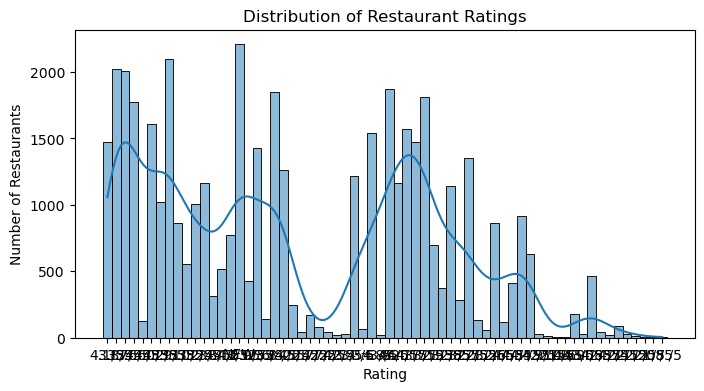

In [19]:
#View Distribution of Ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['rate'], bins=20, kde=True)
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

location
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Name: count, dtype: int64


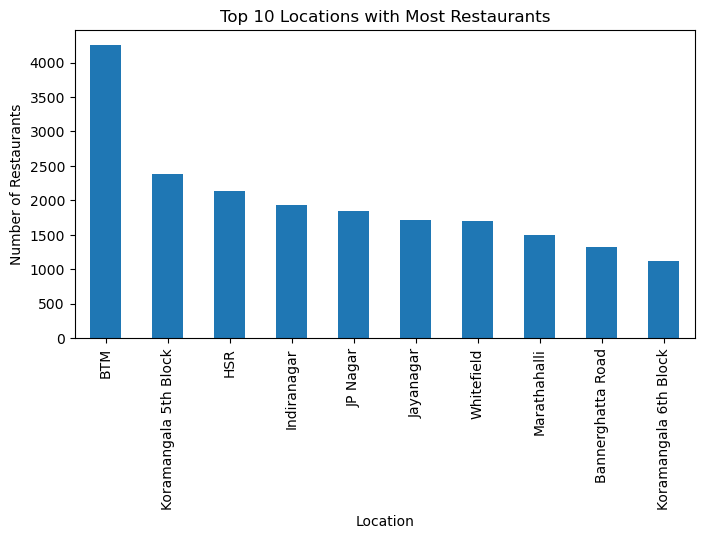

In [20]:
#See Top Locations by Restaurant Count

top_locations = df['location'].value_counts().head(10)
print(top_locations)
top_locations.plot(kind='bar', figsize=(8,4))
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Locations with Most Restaurants")
plt.show()

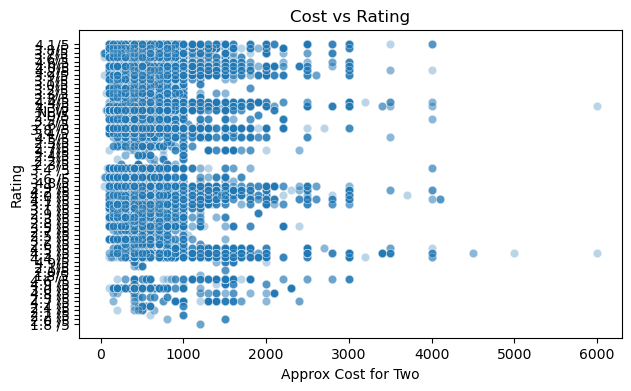

In [21]:
#Looking for Relationships (Votes vs Rating, Cost vs Rating)

plt.figure(figsize=(7,4))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.3)
plt.xlabel("Approx Cost for Two")
plt.ylabel("Rating")
plt.title("Cost vs Rating")
plt.show()

In [22]:
#Convert the Rating (“rate”) column to numeric

def clean_rate(x):
    try:
        x = str(x).split('/')[0]
        x = x.replace('NEW', '').replace('-', '').strip()
        return float(x)
    except:
        return None

df['rate'] = df['rate'].apply(clean_rate)
# Drop rows where rate could not be converted
df = df.dropna(subset=['rate'])

In [23]:
#Convert Categorical Columns to Numerical

df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [31]:
#Finalize Features and Select Target

# Example setup for basic regression (modify as needed)
X = df.drop(['rate', 'name', 'address', 'reviews_list', 'menu_item'], axis=1, errors='ignore')
y = df['rate']


In [32]:
#Train/Test Split
#To evaluate the model fairly, you need to split your data:


from sklearn.model_selection import train_test_split

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
columns_to_drop = [
    'url',          # URLs are not useful for prediction
    'address',      # Addresses are full strings
    'name',         # Restaurant names, not useful for regression
    'reviews_list', # Text reviews
    'menu_item'     # Often text of menu entries
    # Add any other columns that are long text or have unique values for each row
]

df = df.drop(columns=columns_to_drop, errors='ignore')


In [34]:
#Check that all your features are numeric
#After dropping, confirm:


print(df.dtypes)  # Only numeric (int/float) or properly encoded category columns should remain

online_order                     int64
book_table                       int64
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object


In [37]:
#Then define X and y

X = df.drop(['rate'], axis=1)
y = df['rate']

In [38]:
print(X_train.dtypes[X_train.dtypes == 'object'])

location           object
rest_type          object
dish_liked         object
cuisines           object
listed_in(type)    object
listed_in(city)    object
dtype: object


In [41]:
# List your categorical (object) columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to both train and test sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns: make sure train and test have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [42]:
print(X_train.dtypes.unique())  # Should show only 'int64' or 'float64'

[dtype('int64') dtype('float64') dtype('bool')]


In [43]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
#Model Evaluation
#predict the ratings for your test set and evaluate performance:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred = rf.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.120
MAE: 0.054
R²: 0.926


/Users/rithickroy/Documents/sample_projects/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


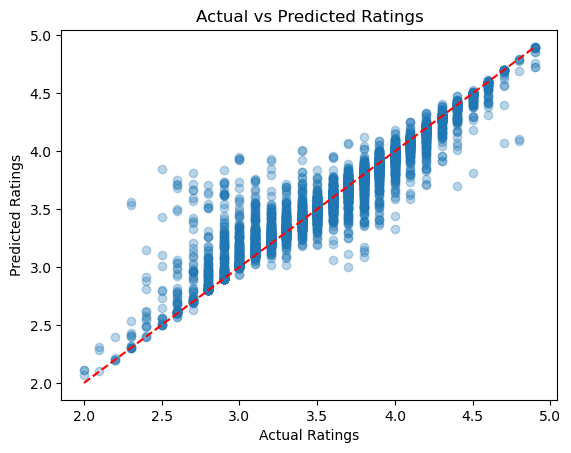

In [45]:
#visualize Results
#Creating a scatter plot to see how your predictions compare with actual ratings:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.show()